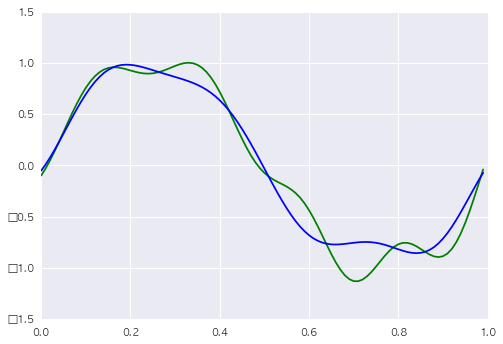

In [1]:
X = np.array([0.02, 0.12, 0.19, 0.27, 0.42, 0.51, 0.64, 0.84, 0.88, 0.99])
t = np.array([0.05, 0.87, 0.94, 0.92, 0.54, -0.11, -0.78, -0.79, -0.89, -0.04])

def phi(x):
    """特徴関数にガウス基底を用いた場合"""
    s = 0.1
    return np.append(1, np.exp(-(x - np.arange(0, 1 + s, s)) ** 2 / (2 * s * s)))

PHI = np.array([phi(x) for x in X])

w = np.linalg.solve(np.dot(PHI.T, PHI), np.dot(PHI.T, t)) # 重みの学習 単純な線形回帰

alpha = 0.1
beta = 9.0
Sigma_N = np.linalg.inv(alpha * np.identity(PHI.shape[1]) + beta * np.dot(PHI.T, PHI))
mu_N = beta * np.dot(Sigma_N, np.dot(PHI.T, t))

xlist = np.arange(0, 1, 0.01)
plt.plot(xlist, [np.dot(w, phi(x)) for x in xlist], "g")
plt.plot(xlist, [np.dot(mu_N, phi(x)) for x in xlist], "b")
plt.show()

OLSでは, 一番いいパラメータを`二乗誤差`が最小となるように求めた.  
その一方で, ベイズ線形回帰では一番いいパラメータを`事後確率`が最大となるように求めている.
これが一番大きな違いで, 押さえるべきポイント.

#### ベイズの定理
$$
p(w | t) = \frac{p(t | w)p(w)}{p(t)}
$$

+ wがパラメータ
+ tが応答変数

tが得られる確率が, $\mu$, $\beta^{-1}$がパラメータの正規分布に従うとしている. 確率化の導入.  
$\beta$が大きいほど, データの分散が小さくなるため, 誤差が小さいことを事前知識として利用していると解釈される.